## Real GEM2 data

Collected at 1 m above the ground, Tx-Rx = 1.66 m, orientation is VDM -> so HCP.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('E:/Padova/Software/InversionEM/emagpy/src')
from emagpy import Problem

In [6]:
k = Problem()
k.createSurvey('gem2-data.csv')
k.surveys[0].df = k.surveys[0].df[::300] # decimate a bit because too many points to plot
print(k.surveys[0].df.columns) # to view the headers
k.rollingMean(window=5)

Converting quadrature columns to LIN ECa. You can use "FSlin" or "Q" as forward model.
Index(['x', 'y', 'Mark', 'Status', 'GPSStat', 'GPSalt', 'Time[ms]',
       'Time[hhmmss.sss]', 'PowerLn', 'HCP0.32f425h1_inph',
       'HCP0.32f425h1_quad', 'HCP0.32f1525h1_inph', 'HCP0.32f1525h1_quad',
       'HCP0.32f5325h1_inph', 'HCP0.32f5325h1_quad', 'HCP0.32f18325h1_inph',
       'HCP0.32f18325h1_quad', 'HCP0.32f63025h1_inph', 'HCP0.32f63025h1_quad',
       'HCP0.32f92775h1_inph', 'HCP0.32f92775h1_quad', 'QSum', 'elevation',
       'HCP0.32f425h1', 'HCP0.32f1525h1', 'HCP0.32f5325h1', 'HCP0.32f18325h1',
       'HCP0.32f63025h1', 'HCP0.32f92775h1'],
      dtype='object')
dataset shrunk of 4 measurements


['HCP0.32f425h1',
 'HCP0.32f1525h1',
 'HCP0.32f5325h1',
 'HCP0.32f18325h1',
 'HCP0.32f63025h1',
 'HCP0.32f92775h1']

E:/Padova/Software/InversionEM/emagpy/src\emagpy\Survey.py:468: MatplotlibDeprecationWarning: Setting the line's pick radius via set_picker is deprecated since 3.3 and will be removed two minor releases later; use set_pickradius instead.
  caxs = ax.plot(xpos, self.df[cols].values, '.-', picker=5)


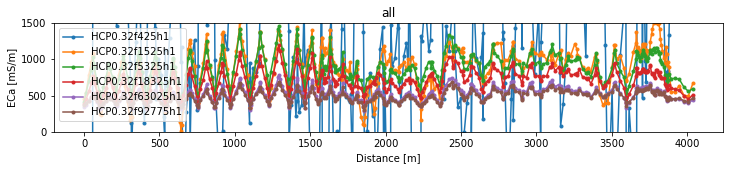

In [7]:
fig, ax = plt.subplots(figsize=(12,2))
k.show(vmin=0, vmax=1500, ax=ax)

In [ ]:
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12,6))
axs = axs.flatten()
for i in range(6):
    ax = axs[i]
    k.showMap(ax=axs[i], coil=k.coils[i])

In [ ]:
k.setInit(depths0=[0.3, 0.6, 1.2])
# inversion takes some time, about 2-3 minutes even in parallel on 4 cores 2.7 GHz
k.invert(forwardModel='CS', njobs=-1)
# k.invert(forwardModel='Q', njobs=-1) # doesn't work so well, value are quite high!

In [ ]:
fig, ax = plt.subplots(figsize=(12,2))
k.showResults(ax=ax)

In [ ]:
k.showOne2one()

In [ ]:
k.showMisfit()

In [ ]:
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,3))
axs = axs.flatten()
for i in range(3):
    ax = axs[i]
    k.showSlice(ax=axs[i], islice=i)